# Multi-exponential fits of $R_{1\rho}$ data

In the following, we verify that $R_{1\rho}$ data is at least biexponential

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from fit_3spin import texp,Iexp,v1
from scipy.optimize import least_squares

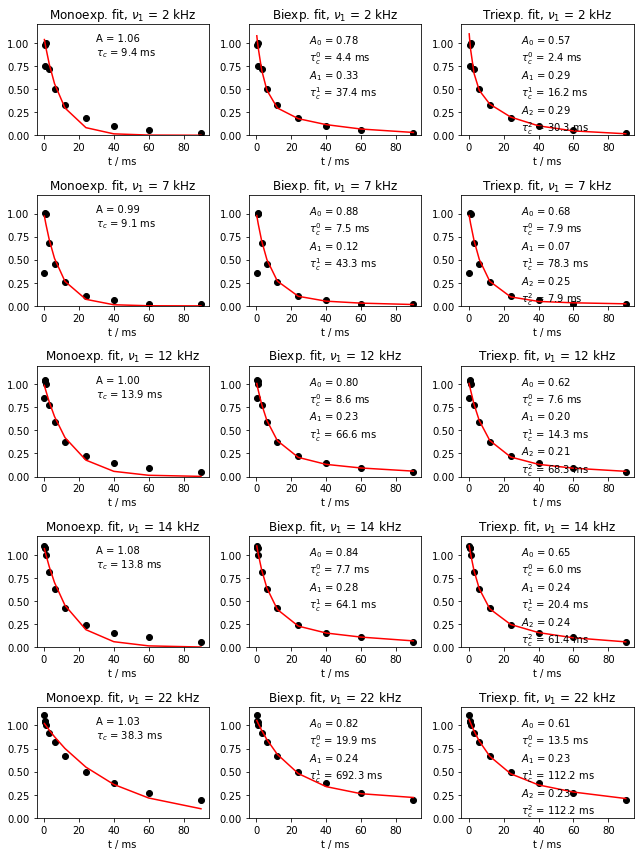

In [7]:
fig,ax0=plt.subplots(5,3)
t=texp*1e3

for q,ax in enumerate(ax0):
    fun0=lambda A,R:A*np.exp(-t*R)
    fun=lambda x:((fun0(*x)-Iexp[q])**2).sum()
    x=least_squares(fun,[1,1/20]).x
    ax[0].plot(t,fun0(*x),color='red')
    ax[0].scatter(t,Iexp[q],color='black',marker='o')
    ax[0].set_xlabel('t / ms')
    ax[0].text(30,1.1,rf'A = {x[0]:.2f}'+'\n'+rf'$\tau_c$ = {1/x[1]:.1f} ms',verticalalignment='top')

    fun0=lambda A0,R0,A1,R1:A0*np.exp(-t*R0)+A1*np.exp(-t*R1)
    x=least_squares(fun,[.8,1/10,.2,1/30]).x
    ax[1].plot(t,fun0(*x),color='red')
    ax[1].scatter(t,Iexp[q],color='black',marker='o')
    ax[1].set_xlabel('t / ms')
    ax[1].text(30,1.1,rf'$A_0$ = {x[0]:.2f}'+'\n'+rf'$\tau_c^0$ = {1/x[1]:.1f} ms'+'\n'+
              rf'$A_1$ = {x[2]:.2f}'+'\n'+rf'$\tau_c^1$ = {1/x[3]:.1f} ms',verticalalignment='top')

    fun0=lambda A0,R0,A1,R1,A2,R2:A0*np.exp(-t*R0)+A1*np.exp(-t*R1)+A2*np.exp(-t*R2)
    x=least_squares(fun,[.6,1/10,.2,1/30,.2,1/100]).x
    ax[2].plot(t,fun0(*x),color='red')
    ax[2].scatter(t,Iexp[q],color='black',marker='o')
    ax[2].set_xlabel('t / ms')
    ax[2].text(30,1.1,rf'$A_0$ = {x[0]:.2f}'+'\n'+rf'$\tau_c^0$ = {1/x[1]:.1f} ms'+'\n'+
              rf'$A_1$ = {x[2]:.2f}'+'\n'+rf'$\tau_c^1$ = {1/x[3]:.1f} ms'+'\n'+
              rf'$A_2$ = {x[4]:.2f}'+'\n'+rf'$\tau_c^2$ = {1/x[5]:.1f} ms',verticalalignment='top')
    for k,a in enumerate(ax):
        a.set_title(rf'{["Mono","Bi","Tri"][k]}exp. fit, $\nu_1$ = {v1[q]:.0f} kHz')
        a.set_ylim([0,1.2])

fig.set_size_inches([9,12])
fig.tight_layout()

One sees that monoexponential fits usually do not fit the data well, whereas triexponential fits return only minor improvements over bioexponential fits.